# Tutorial on prior matching proposals

In [1]:
%load_ext autoreload
%autoreload 2

In [1]:
from sbi.inference import SNLE_A, SNPE
from sbi.utils import BoxUniform, posterior_nn
from sbi.analysis import pairplot
import torch
from torch import ones, zeros
import matplotlib.pyplot as plt
from torch.distributions import MultivariateNormal
from sbi.utils import PriorMatchingProposal
from copy import deepcopy

In [2]:
num_dim = 2
prior = BoxUniform(-2*ones(num_dim), 2*ones(num_dim))

In [3]:
def simulator(theta):
    return theta + 0.2*torch.randn(theta.shape[0], num_dim)

In [4]:
theta_ = prior.sample((1000,))
x_ = simulator(theta_)

In [5]:
xo = zeros(2)

In [6]:
density_estimator = posterior_nn("maf", z_score_theta=False, z_score_x=False)

In [7]:
inference = SNPE(prior=prior, density_estimator=density_estimator)
_ = inference.append_simulations(theta_, x_).train(max_num_epochs=100)

In [8]:
posterior = inference.build_posterior().set_default_x(xo)

In [9]:
saved_posterior = deepcopy(posterior)

In [10]:
pmp = saved_posterior.build_prior_matching_proposal()

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

In [11]:
pmp_samples = pmp.sample((1000,))

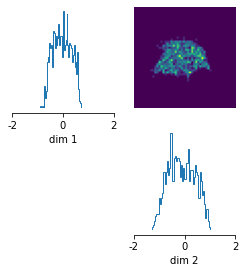

In [12]:
_ = pairplot(pmp_samples, limits=[[-2,2], [-2,2]], figsize=(4,4))